# Viewer

The real-time web viewer enabled communication between Python and the ReactJS Client Viewer Application. Here we provide a walkthrough for how to use the viewer to draw information as well as read information from the GUI.


In [16]:
# HIDDEN
%load_ext autoreload
%autoreload 2
import pprint
import torch
from nerfactory.viewer.server.visualizer import Viewer
from nerfactory.data.structs import SceneBounds

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Connecting to the viewer from Python

Navigate to ...

In [17]:
# connect to the viewer
vis = Viewer(zmq_url="tcp://127.0.0.1:6000")

In [18]:
# draw a red box
# viewer_utils.show_box_test(vis)
s = 3
scene_bounds = SceneBounds(aabb=torch.tensor([[-s, -s, -s], [s, s, s]]))
json_ = scene_bounds.to_json()
pprint.pprint(json_)
vis["sceneState/sceneBounds"].write(json_)

{'max_point': [3, 3, 3], 'min_point': [-3, -3, -3], 'type': 'aabb'}
/sceneState/sceneBounds


b'ok'

In [19]:
vis["sceneState/sceneBounds"].write(json_)

/sceneState/sceneBounds


b'ok'

In [20]:
import numpy as np
import torch

""

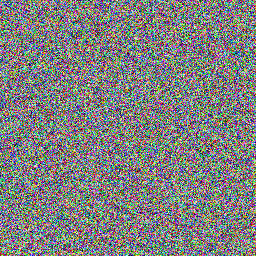

In [21]:
image = torch.rand(256, 256, 3)
import mediapy as media
media.show_image(image)

In [22]:
from nerfactory.cameras.cameras import PinholeCamera

In [23]:
camera = PinholeCamera(cx=100, cy=100, fx=50, fy=50)

In [24]:
json_ = camera.to_json(image=image)

In [25]:
vis[f"sceneState/cameras/000000"].write(camera.to_json(image=image))

/sceneState/cameras/000000


b'ok'

In [26]:
# vis[f"sceneState"].delete()

In [27]:
vis[f"renderingState/cameras/object/fov"].read()

In [30]:
vis[f"renderingState/camera/object/fov"].write(1000)

/renderingState/camera/object/fov


b'ok'

In [31]:
vis[f"renderingState/camera/object/aspect"].write(0.5)

/renderingState/camera/object/aspect


b'ok'